# For Any News Website - Scrapper Using Python

## Update the Variables with right html selector tag from news website inspect

In [ ]:
article_selector = 'ie_ga_event_tracking'  # to select the article a tag url
section_selector = 'data-ie-event-label'   # to select the section/category of the url.

In [ ]:
#libraries required

import requests
from bs4 import BeautifulSoup
from collections import deque

In [ ]:
url = "https://indianexpress.com/" #Update URL for New News Website

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url, headers=headers)

data = {'link': [], 'section_value': []} # data to store the primary sections urls with section_value.

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    # print(soup)

    # Extract all links with the specified class for the next level of BFS
    links_with_class = soup.find_all('a', class_=article_selector, href=True)
    print(links_with_class)
    unique_url = list(set(links_with_class))

    for link in unique_url:
        absolute_link = link['href']
        section_value = link.get(section_selector, 'N/A')

        # Append the values to the data dictionary
        data['link'].append(absolute_link)
        data['section_value'].append(section_value)

print(data)


[<a class="ie_ga_event_tracking" data-ie-event-action="Other Sites" data-ie-event-category="Header Desktop" data-ie-event-label="English" href="https://indianexpress.com/" id="IE_TOP_VERNACULAR_ENGLISH" rel="noopener" target="_blank">English</a>, <a class="ie_ga_event_tracking" data-ie-event-action="Other Sites" data-ie-event-category="Header Desktop" data-ie-event-label="தமிழ்" href="https://tamil.indianexpress.com/" id="IE_TOP_VERNACULAR_TAMIL" rel="noopener" target="_blank">தமிழ்</a>, <a class="ie_ga_event_tracking" data-ie-event-action="Other Sites" data-ie-event-category="Header Desktop" data-ie-event-label="বাংলা" href="https://bengali.indianexpress.com/" id="IE_TOP_VERNACULAR_BANGLA" rel="noopener" target="_blank">বাংলা</a>, <a class="ie_ga_event_tracking" data-ie-event-action="Other Sites" data-ie-event-category="Header Desktop" data-ie-event-label="മലയാളം" href="https://malayalam.indianexpress.com/" id="IE_TOP_VERNACULAR_MALAYALAM" rel="noopener" target="_blank">മലയാളം</a>, <a

In [ ]:
import pandas as pd

In [ ]:
datafrm = pd.DataFrame(data)

datafrm

,link,section_value
0,https://www.instagram.com/indianexpress/,N/A
1,/login/,Sign In
2,https://indianexpress.com/article/cities/hyder...,https://indianexpress.com/article/cities/hyder...
3,https://indianexpress.com/article/cities/kolka...,https://indianexpress.com/article/cities/kolka...
4,https://indianexpress.com/article/cities/banga...,https://indianexpress.com/article/cities/banga...
...,...,...
118,https://indianexpress.com/article/cities/mumba...,https://indianexpress.com/article/cities/mumba...
119,https://indianexpress.com/section/express-excl...,Investigations
120,https://indianexpress.com/article/cities/delhi...,https://indianexpress.com/article/cities/delhi...
121,/todays-paper/,Today’s Paper


In [ ]:
selected_values = ['Entertainment','Business','Sports', "World","Tech"]  #select intersted section articles url from dataframe datafrm

# Select rows where 'section_value' is in the list of selected values
selected_df = datafrm[datafrm['section_value'].isin(selected_values)]

# Display the selected rows DataFrame
print("Selected DataFrame:")
print(selected_df)

Selected DataFrame:
                                                link  section_value
15  https://indianexpress.com/section/entertainment/  Entertainment
16  https://indianexpress.com/section/entertainment/  Entertainment
27                 https://www.financialexpress.com/       Business
29         https://indianexpress.com/section/sports/         Sports
55          https://indianexpress.com/section/world/          World
66                                /section/business/       Business
79       https://indianexpress.com/section/business/       Business
85                              /section/technology/           Tech
86         https://indianexpress.com/section/sports/         Sports


In [ ]:
# check if end web url of any of section is accessible or not

url="https://indianexpress.com/section/entertainment/"

response = requests.get(url)
print(response)
if response.status_code == 200:
  print("accessible")
else:
  print("denied")

<Response [200]>
accessible


In [ ]:
#initializing a Data_Href to store all the links in respective section value url.

Data_Href = {"href": [], "section_value": []}
i=0

In [ ]:
""""
as a stopping or appending condition in bfs search algorithm this could include .cms , .html , etc
for theindianexpress all end article urls involves "-90", therefor
example = https://indianexpress.com/article/sports/football/magnus-carlsen-pep-guardiola-football-chess-similarities-9067158/

"""
urlendstring = '-90'

In [ ]:
""""
this is the main algorithm that finds links in start_utl append them in a queue and
check again with all the links inside a queue to find all the links within the pop.item()
from the queue and once a link with .html or with urlendstring variable matches
it appends the url and section value in data_href

"""

def bfs_search(start_url, section_value):
    visited = set()
    queue = [(start_url, section_value)]
    max_cms_appends = 35
    cms_appends_count = 0
    i = 0

    while queue and cms_appends_count < max_cms_appends:
        current_url, current_section_value = queue.pop(0)
        i = i + 1
        print(i)

        if current_url in visited:
            continue

        try:
            response = requests.get(current_url)
            response.raise_for_status()

            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract all links with 'a' tag and 'href' attribute
            links_with_href = soup.find_all('a', href=True)

            for link in links_with_href:
                absolute_link = link['href']
                queue.append((absolute_link, current_section_value))

            # if current_url.endswith('.cms'):   #change to .html for html format end page
            #     # Append the values to the Data_Href dictionary
            #     print(current_url)
            #     Data_Href['href'].append(current_url)
            #     Data_Href['section_value'].append(current_section_value)
            #     cms_appends_count += 1

            if urlendstring in current_url:
                # Append the values to the Data_Href dictionary
                print(current_url)
                Data_Href['href'].append(current_url)
                Data_Href['section_value'].append(current_section_value)
                cms_appends_count += 1

        except requests.exceptions.RequestException as e:
            print(f"Error processing URL {current_url}: {e}")

        visited.add(current_url)

    return Data_Href


In [ ]:
#looping over our selected_df dataframe whihc contains the start urls of each section.

for index, row in selected_df.iterrows():
    start_url = row['link']
    section_value = row['section_value']
    bfs_search(start_url, section_value)

# Convert the Data_Href dictionary to a DataFrame
result_df = pd.DataFrame(Data_Href)

# Display the resulting DataFrame
result_df

1
2
3
4
5
6
7
8
9
Error processing URL https://www.financialexpress.com/: 403 Client Error: Forbidden for url: https://www.financialexpress.com/
10
11
12
13
Error processing URL https://twitter.com/IndianExpress: 400 Client Error: Bad Request for url: https://twitter.com/IndianExpress
14
15
Error processing URL https://www.instagram.com/indianexpress/: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Findianexpress%2F
16
Error processing URL /subscribe/epaper/: Invalid URL '/subscribe/epaper/': No scheme supplied. Perhaps you meant https:///subscribe/epaper/?
17
Error processing URL /todays-paper/: Invalid URL '/todays-paper/': No scheme supplied. Perhaps you meant https:///todays-paper/?
18
Error processing URL /: Invalid URL '/': No scheme supplied. Perhaps you meant https:///?
19
20
21
22
23
24
25
26
27
28
29
Error processing URL /section/technology/: Invalid URL '/section/technology/': No scheme supplied. P

,href,section_value
0,https://indianexpress.com/article/entertainmen...,Entertainment
1,https://indianexpress.com/article/entertainmen...,Entertainment
2,https://indianexpress.com/article/entertainmen...,Entertainment
3,https://indianexpress.com/photos/entertainment...,Entertainment
4,https://indianexpress.com/article/entertainmen...,Entertainment
...,...,...
205,https://indianexpress.com/article/sports/crick...,Sports
206,https://indianexpress.com/article/sports/crick...,Sports
207,https://indianexpress.com/article/sports/crick...,Sports
208,https://indianexpress.com/article/sports/sport...,Sports


In [ ]:
#saving results
result_df.to_csv('result.csv', index=False)

This Result file contains all the end url of an article from the website and thier section or category .<br>
now we need to loop through all the article urls and extract the title, article_body and keep the section_value same.

## Update the selectors according to website

In [ ]:
#For Each website update the class of Header to H1_class and Article body to article_body_html_tag

# H1, classs - native_story_title -TITLE
h1_class = "native_story_title"

#content Body - div - class - _s30J {Tech , World} inside div class full details p tags contains article text data therefore
article_body_html_tag="div"
article_body_class ="full-details"

In [ ]:
#testing fro title and article body content

url= "https://indianexpress.com/article/sports/football/magnus-carlsen-pep-guardiola-football-chess-similarities-9067158/"

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')


title = soup.find('h1', class_=h1_class).text if soup.find('h1', class_=h1_class) else None
print(title)

article_body_div = soup.find(article_body_html_tag, class_=article_body_class)
article_body = " ".join([p.text for p in article_body_div.find_all('p')]) if article_body_div and article_body_div.find('p') else None
print(article_body)

The important thing is to control the middle: Magnus Carlsen discusses similarities between football and chess with Pep Guardiola
Two modern icons met face to face recently as treble winning coach Pep Guardiola and 5-time chess world champion Magnus Carlsen engaged in riveting conversation. In a video shared by Puma, Carlsen who is a known football fan and a supporter of Spanish giants Real Madrid, explained to Guardiola how the two sports were similar. “The important thing is to control the middle. If you control the middle, you control the pitch or the board,” Carlsen said while also adding that he used to play football in his formative years but because he was better at chess, he pursued that. Watch the full video here👇https://t.co/bZSPN0tjLQ — Magnus Carlsen (@MagnusCarlsen) December 12, 2023 “Another thing is that often in chess you attack on one side, force the opponent to overload and then you switch and you have an advantage on the other side. In terms of space, it’s remarkably

In [ ]:
#final data to store title , article_body , section_values

Final_Data = {"Title": [], "Article_body": [], "section_value": []}

## looping through result_df which has links and section_value to extract the title, article_body.

In [ ]:
for index, row in result_df.iterrows():
    url = row['href']
    section_value = row['section_value']
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.find('h1', class_=h1_class).text if soup.find('h1', class_=h1_class) else None
        # print(title)
        # Extracting article body (assuming it's in a div with class 'ULEYK')
        article_body_div = soup.find(article_body_html_tag, class_=article_body_class)
        article_body = " ".join([p.text for p in article_body_div.find_all('p')]) if article_body_div and article_body_div.find('p') else None


        # Append the values to the Final_Data dictionary
        Final_Data['Title'].append(title)
        Final_Data['Article_body'].append(article_body)
        Final_Data['section_value'].append(section_value)

    except requests.exceptions.RequestException as e:
        print(f"Error processing URL {url}: {e}")

# Convert the Final_Data dictionary to a DataFrame
final_df = pd.DataFrame(Final_Data)

# Save the DataFrame to a CSV file
final_df.to_csv('Final_Data.csv', index=False)

# Display the resulting DataFrame
final_df

,Title,Article_body,section_value
0,Salaar box office collection Day 13: Prabhas’ ...,The Prabhas-starrer Salaar has been playing in...,Entertainment
1,Khushi Kapoor says father Boney Kapoor cried a...,Sisters Janhvi Kapoor and Khushi Kapoor appear...,Entertainment
2,Janhvi Kapoor recalls ‘howling’ when she got t...,When veteran actor Sridevi passed away in Febr...,Entertainment
3,None,None,Entertainment
4,Deepika Padukone says she’s looking forward to...,Deepika Padukone has always said that she and ...,Entertainment
...,...,...,...
205,Pat Cummins on the perfect farewell for David ...,All is in readiness for David Warner to take t...,Sports
206,India vs South Africa 2nd Test tip-off XI: Rav...,India vs South Africa 2nd Test: After a dismal...,Sports
207,"I’d change my technique to copy Virat Kohli, a...",South Africa’s David Bedingham reveals he used...,Sports
208,Two of the big questions for 2024: Rohit Sharm...,"It’s not about sentiments, to give Rohit Sharm...",Sports


FInally we successfully extracted all the data and saved it inside final_data.csv. <br>

TO keep the notebook simple please check News Data Analysis Notebook.

In [ ]:
final_df.describe()

,Title,Article_body,section_value
count,84,84,175
unique,83,83,5
top,Dr Reddyâs acquires MenoLabs womenâs welln...,HYDERABAD: Pharma major Dr Reddyâs Laborator...,Entertainment
freq,2,2,35


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          84 non-null     object
 1   Article_body   84 non-null     object
 2   section_value  175 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


In [ ]:
final_df['section_value'].unique()

array(['Entertainment', 'Business', 'Sports', 'World', 'Tech'],
      dtype=object)

In [ ]:
final_df.isnull().sum()

Title            91
Article_body     91
section_value     0
dtype: int64

In [ ]:
#removing blank values
final_df_cleaned = final_df.dropna(subset=['Title', 'Article_body']).reset_index(drop=True)

In [ ]:
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          84 non-null     object
 1   Article_body   84 non-null     object
 2   section_value  84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [ ]:
final_df_cleaned

,Title,Article_body,section_value
0,How to spot a fake diamond?,"Diamonds are a womanâs best friend. However,...",Entertainment
1,â24 Beauty hacks to try in 2024,Caring for your beauty in the new year goes be...,Entertainment
2,Back pain on the rise in children: Whatâs th...,With children returning to school after the va...,Entertainment
3,Aamir Khan's daughter Ira Khan is now official...,Aamir Khan's darling daughter Ira Khan has now...,Entertainment
4,"After Ranbir Kapoor, 'Animal' director Sandeep...",After delivering his second blockbuster movie ...,Entertainment
...,...,...,...
79,What is the screen distance feature in the iPh...,The iPhone Screen Distance feature in iOS 17 i...,Tech
80,Former highest-paid executive at Google is now...,"He became the highest-paid executive at , got...",Tech
81,Google One limited-time offer: Get additional ...,Every account comes with 15GB of free cloud ...,Tech
82,Google fixes issue with Chrome 'malware' that ...,Recently it was reported that there were sever...,Tech


In [ ]:
final_df_no_duplicates = final_df_cleaned.drop_duplicates(keep='first')

In [ ]:
final_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 83
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          83 non-null     object
 1   Article_body   83 non-null     object
 2   section_value  83 non-null     object
dtypes: object(3)
memory usage: 2.6+ KB


In [ ]:
final_df_no_duplicates.describe()

,Title,Article_body,section_value
count,83,83,83
unique,83,83,5
top,How to spot a fake diamond?,"Diamonds are a womanâs best friend. However,...",Tech
freq,1,1,27


In [ ]:
final_df_no_duplicates.to_csv('final_df_no_duplicates.csv', index=False)

In [ ]:
final_df_no_duplicates.isnull().sum()

Title            0
Article_body     0
section_value    0
dtype: int64

In [ ]:
final_df_no_duplicates

,Title,Article_body,section_value
0,How to spot a fake diamond?,"Diamonds are a womanâs best friend. However,...",Entertainment
1,â24 Beauty hacks to try in 2024,Caring for your beauty in the new year goes be...,Entertainment
2,Back pain on the rise in children: Whatâs th...,With children returning to school after the va...,Entertainment
3,Aamir Khan's daughter Ira Khan is now official...,Aamir Khan's darling daughter Ira Khan has now...,Entertainment
4,"After Ranbir Kapoor, 'Animal' director Sandeep...",After delivering his second blockbuster movie ...,Entertainment
...,...,...,...
79,What is the screen distance feature in the iPh...,The iPhone Screen Distance feature in iOS 17 i...,Tech
80,Former highest-paid executive at Google is now...,"He became the highest-paid executive at , got...",Tech
81,Google One limited-time offer: Get additional ...,Every account comes with 15GB of free cloud ...,Tech
82,Google fixes issue with Chrome 'malware' that ...,Recently it was reported that there were sever...,Tech


In [ ]:
import matplotlib.pyplot as plt

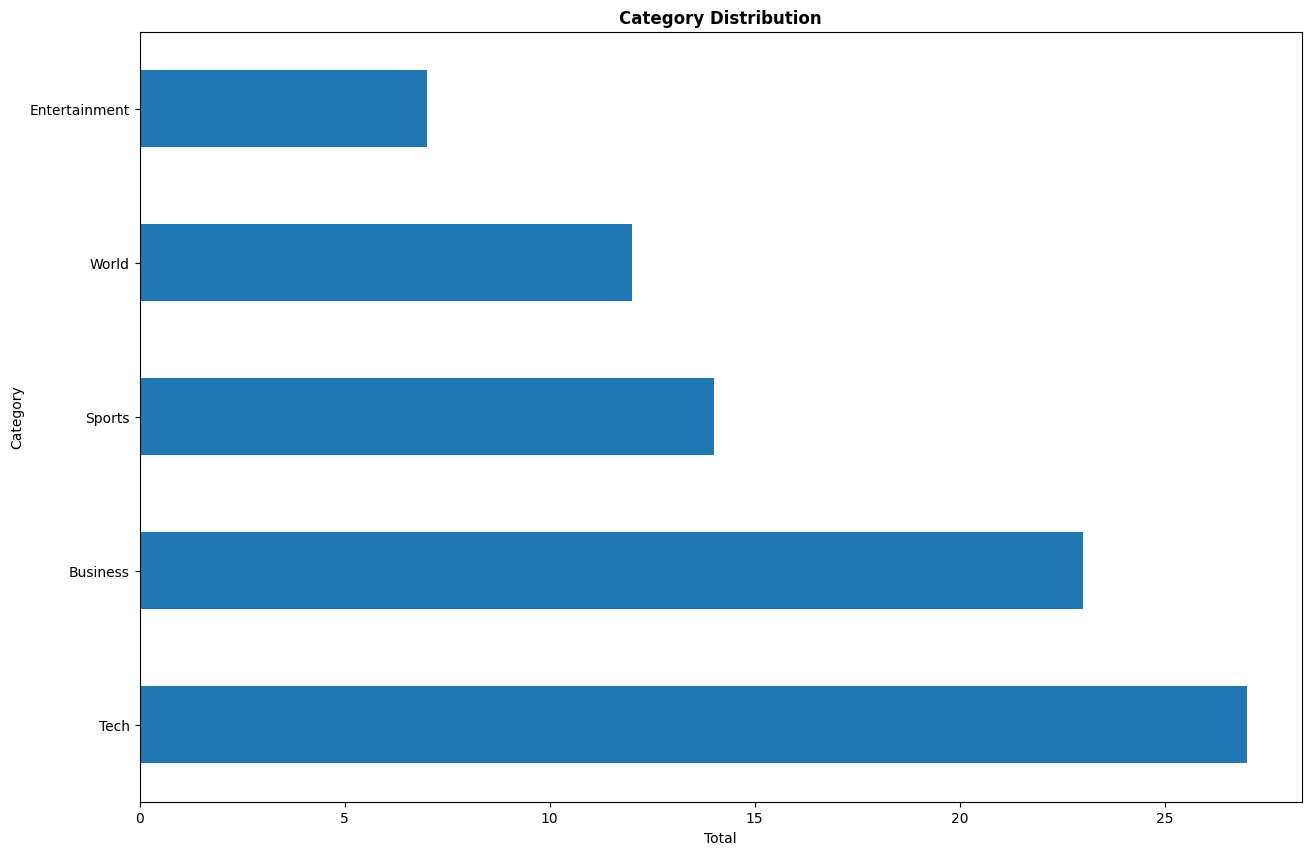

In [ ]:
final_df_no_duplicates['section_value'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Category")
plt.title("Category Distribution",
          fontweight="bold", size=12);

In [ ]:
import seaborn as sns

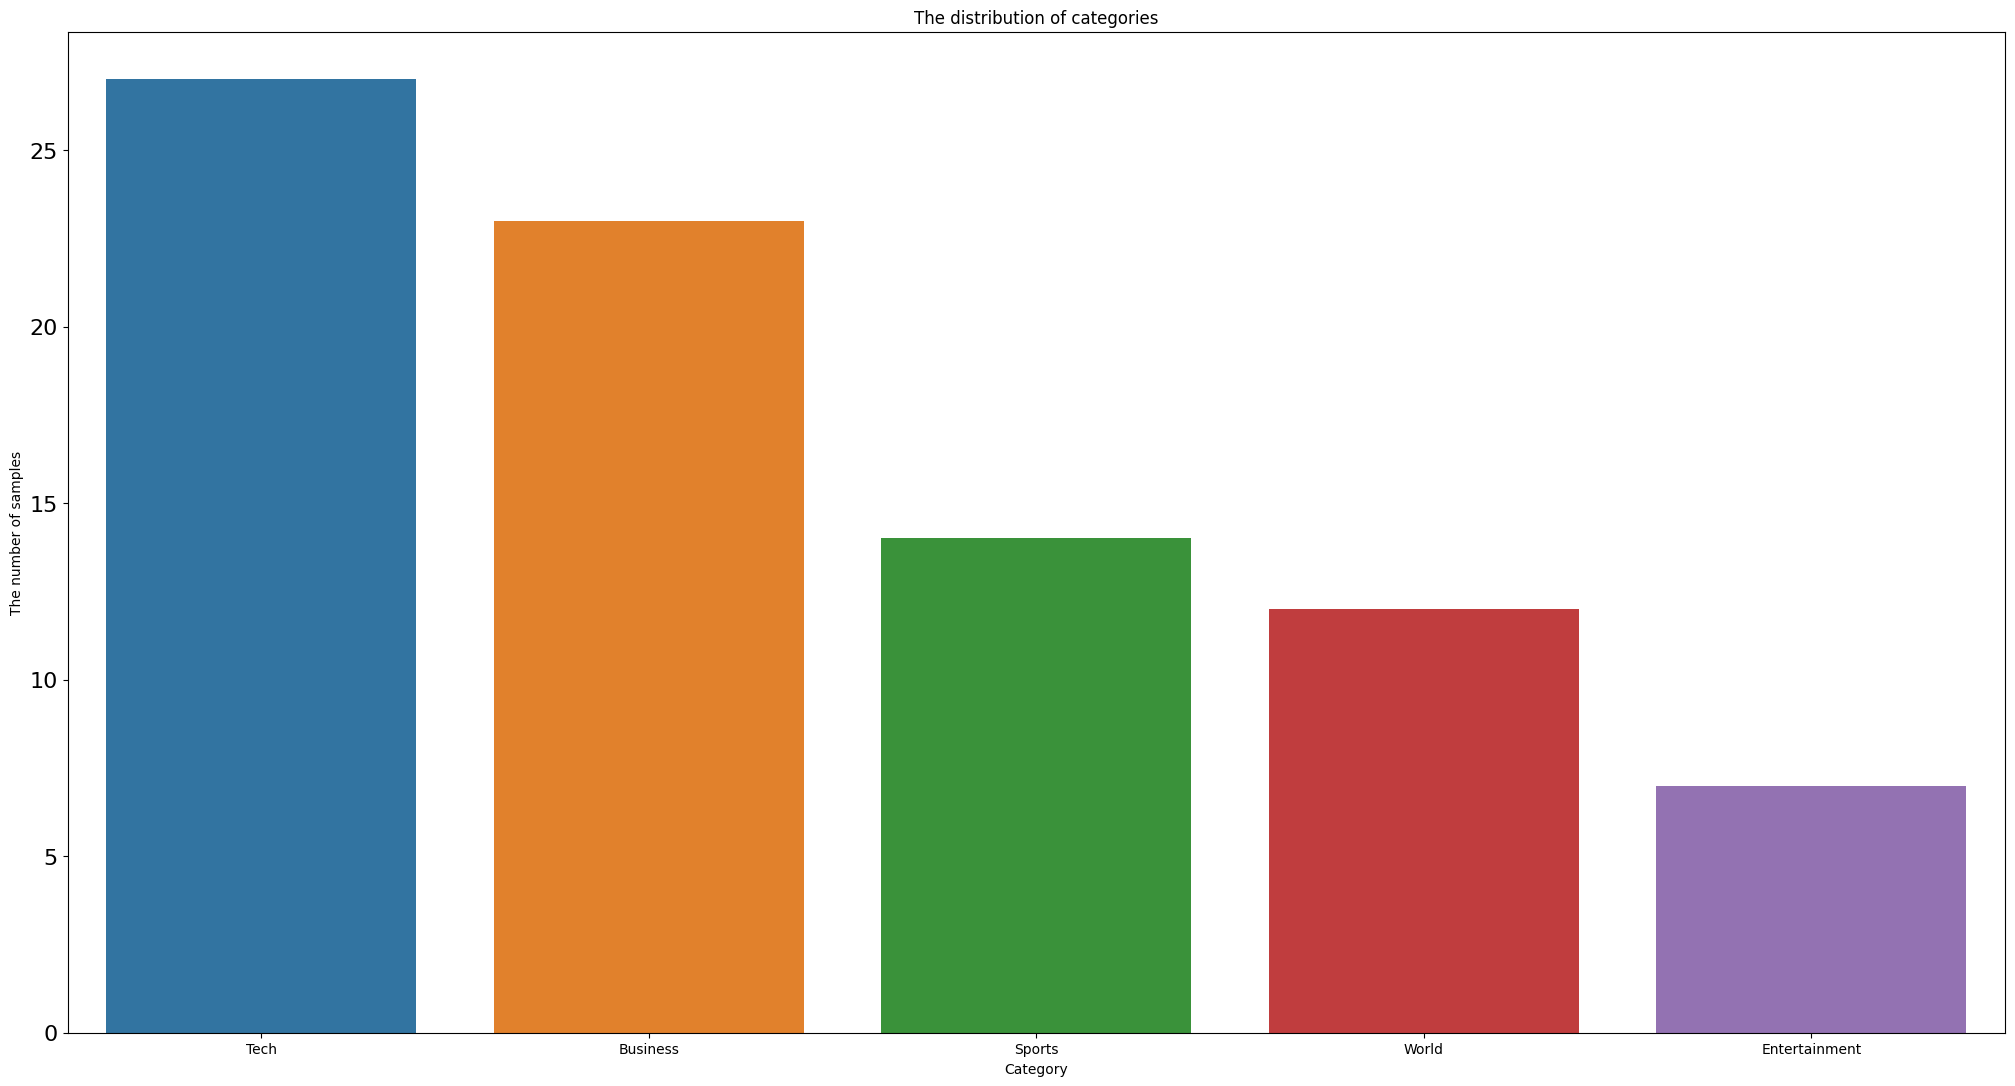

In [ ]:
plt.figure(figsize=(25,13))
sns.barplot(y=final_df_no_duplicates['section_value'].value_counts().values,x=final_df_no_duplicates['section_value'].value_counts().index)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 16)
plt.show()

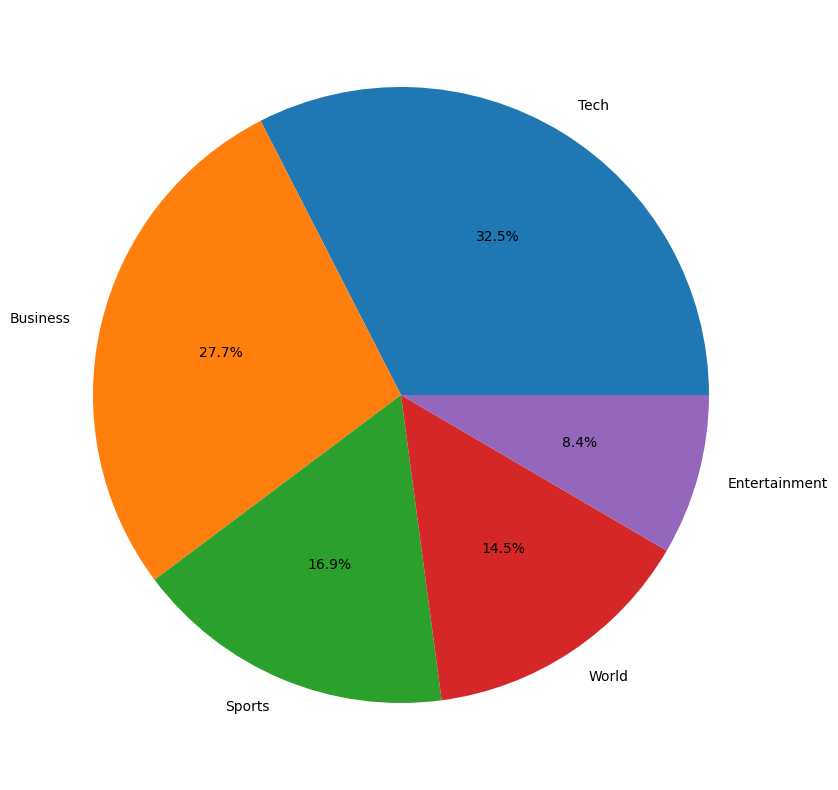

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(final_df_no_duplicates['section_value'].value_counts().values, autopct="%1.1f%%", labels=final_df_no_duplicates['section_value'].value_counts().index)
plt.show()

In [ ]:
final_df_no_duplicates['full_article'] = final_df_no_duplicates['Title'] + " " + final_df_no_duplicates['Article_body']
final_df_no_duplicates.head()

<ipython-input-213-5b5eb3928839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_no_duplicates['full_article'] = final_df_no_duplicates['Title'] + " " + final_df_no_duplicates['Article_body']


,Title,Article_body,section_value,full_article
0,How to spot a fake diamond?,"Diamonds are a womanâs best friend. However,...",Entertainment,How to spot a fake diamond? Diamonds are a wom...
1,â24 Beauty hacks to try in 2024,Caring for your beauty in the new year goes be...,Entertainment,â24 Beauty hacks to try in 2024 Caring for y...
2,Back pain on the rise in children: Whatâs th...,With children returning to school after the va...,Entertainment,Back pain on the rise in children: Whatâs th...
3,Aamir Khan's daughter Ira Khan is now official...,Aamir Khan's darling daughter Ira Khan has now...,Entertainment,Aamir Khan's daughter Ira Khan is now official...
4,"After Ranbir Kapoor, 'Animal' director Sandeep...",After delivering his second blockbuster movie ...,Entertainment,"After Ranbir Kapoor, 'Animal' director Sandeep..."


In [ ]:
final_df_no_duplicates['news_len'] = final_df_no_duplicates['full_article'].apply(lambda x: len(x))
final_df_no_duplicates.head()

<ipython-input-214-e5f6d1c1ca31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_no_duplicates['news_len'] = final_df_no_duplicates['full_article'].apply(lambda x: len(x))


,Title,Article_body,section_value,full_article,news_len
0,How to spot a fake diamond?,"Diamonds are a womanâs best friend. However,...",Entertainment,How to spot a fake diamond? Diamonds are a wom...,2563
1,â24 Beauty hacks to try in 2024,Caring for your beauty in the new year goes be...,Entertainment,â24 Beauty hacks to try in 2024 Caring for y...,4917
2,Back pain on the rise in children: Whatâs th...,With children returning to school after the va...,Entertainment,Back pain on the rise in children: Whatâs th...,2589
3,Aamir Khan's daughter Ira Khan is now official...,Aamir Khan's darling daughter Ira Khan has now...,Entertainment,Aamir Khan's daughter Ira Khan is now official...,2710
4,"After Ranbir Kapoor, 'Animal' director Sandeep...",After delivering his second blockbuster movie ...,Entertainment,"After Ranbir Kapoor, 'Animal' director Sandeep...",1864


In [ ]:
final_df_no_duplicates.groupby('section_value')['news_len'].mean().reset_index().sort_values(by='news_len',ascending=False)

,section_value,news_len
2,Sports,3714.714286
4,World,2746.833333
1,Entertainment,2664.857143
0,Business,2393.000000
3,Tech,2320.888889


{'whiskers': [<matplotlib.lines.Line2D at 0x7f32710e0280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32710e07c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32710dbaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32710e0d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32710e0fa0>],
 'means': []}

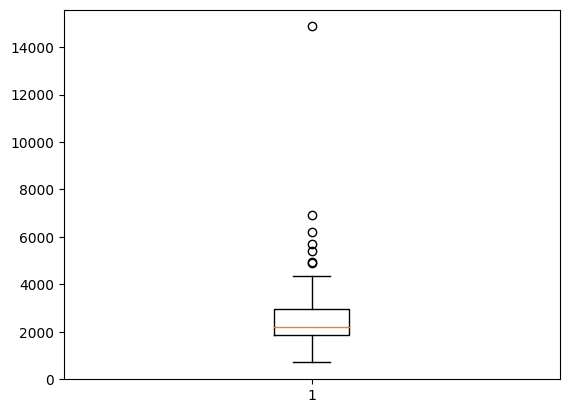

In [ ]:
plt.boxplot(final_df_no_duplicates['news_len'])

In [ ]:
count = 0
max_threshold = final_df_no_duplicates['news_len'].std() *3 + final_df_no_duplicates['news_len'].mean()
min_threshold = abs(final_df_no_duplicates['news_len'].mean() - final_df_no_duplicates['news_len'].std()*3)
for num in final_df_no_duplicates['news_len']:
    if num > max_threshold or num < min_threshold:
      count += 1
print("The total outliers are = ",count)

The total outliers are =  59


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Importing models
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import nltk
#Dowloading 'punkt' and 'stopwords' to make use of word_tokenize and remove stopwords respectively
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower() #To convert to lowercase

    tokens = nltk.word_tokenize(text) #Inorder to tokenize the text into word tokens

    tokens = [token for token in tokens if token.isalpha()] #Remove puncutations and numbers

    tokens = [token for token in tokens if token not in stop_words] #Remove Stopwords

    tokens = [lemmatizer.lemmatize(token) for token in tokens] #Lemmitization

    return tokens

In [ ]:
final_df_no_duplicates.loc[:, ('full_article_tokens')] = final_df_no_duplicates.loc[:,('full_article')].apply(lambda x: preprocess(x))

<ipython-input-222-8302a54ee4bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_no_duplicates.loc[:, ('full_article_tokens')] = final_df_no_duplicates.loc[:,('full_article')].apply(lambda x: preprocess(x))


In [ ]:
final_df_no_duplicates.to_csv('Final_Preprocessed_Data.csv', index=False)

In [ ]:
encoder = LabelEncoder()
final_df_no_duplicates['SectionEncoded'] = encoder.fit_transform(final_df_no_duplicates['section_value'])

<ipython-input-226-9ced80d290f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_no_duplicates['SectionEncoded'] = encoder.fit_transform(final_df_no_duplicates['section_value'])


In [ ]:
final_df_no_duplicates.head()

,Title,Article_body,section_value,full_article,news_len,full_article_tokens,SectionEncoded
0,How to spot a fake diamond?,"Diamonds are a womanâs best friend. However,...",Entertainment,How to spot a fake diamond? Diamonds are a wom...,2563,"[spot, fake, diamond, diamond, best, friend, h...",1
1,â24 Beauty hacks to try in 2024,Caring for your beauty in the new year goes be...,Entertainment,â24 Beauty hacks to try in 2024 Caring for y...,4917,"[beauty, hack, try, caring, beauty, new, year,...",1
2,Back pain on the rise in children: Whatâs th...,With children returning to school after the va...,Entertainment,Back pain on the rise in children: Whatâs th...,2589,"[back, pain, rise, child, right, way, wear, ba...",1
3,Aamir Khan's daughter Ira Khan is now official...,Aamir Khan's darling daughter Ira Khan has now...,Entertainment,Aamir Khan's daughter Ira Khan is now official...,2710,"[aamir, khan, daughter, ira, khan, officially,...",1
4,"After Ranbir Kapoor, 'Animal' director Sandeep...",After delivering his second blockbuster movie ...,Entertainment,"After Ranbir Kapoor, 'Animal' director Sandeep...",1864,"[ranbir, kapoor, director, sandeep, reddy, van...",1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Convert tokens to vectors
def custom_token(tokens):
    return tokens

vectorizer = TfidfVectorizer(tokenizer = custom_token,
                             preprocessor = None,
                             lowercase = False)

x = vectorizer.fit_transform(final_df_no_duplicates['full_article_tokens'])

# encode category labels
encoder = LabelEncoder()
y = encoder.fit_transform(final_df_no_duplicates['section_value'])
category_labels = encoder.classes_


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# function for displaying scores and confusion matrix
def display_confusion_matrix(x_test, y_test, model, labels = category_labels):
    # predict x_test
    predictions = model.predict(x_test)
    name = type(model).__name__

    # print model name and score
    try:
        score = model.score(x_test, y_test)
        print(f'{name} score: {score}')
    except:
        None

    # print confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_labels)
    disp.plot(values_format=".2f")
    plt.xticks(rotation=60)

# function for grid search results
def display_grid_search_results(grid_search):
    return pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
               pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns = ['mean test score']),
               pd.DataFrame(grid_search.cv_results_["mean_fit_time"], columns = ['mean fit time']),
               pd.DataFrame(grid_search.cv_results_["mean_score_time"], columns = ['mean score time']),],axis=1)

In [ ]:
import numpy as np

Fitting 3 folds for each of 8 candidates, totalling 24 fits
RandomForestClassifier score: 0.7647058823529411


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 0}

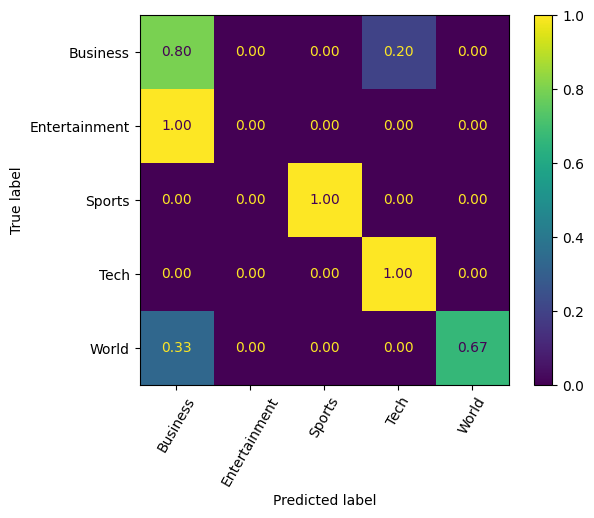

In [ ]:
rf_param_grid = {
    'bootstrap': [True],
    'random_state': [0],
    'max_depth': [None],
    'max_features': [2, "sqrt"],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [10, 12],
    'n_estimators': [100]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid,
                          cv = 3, n_jobs = -1, verbose = 2).fit(x_train, y_train)

# save best estimator and display cm
best_rf = rf_grid_search.best_estimator_
display_confusion_matrix(x_test, y_test, best_rf)

# print best params
rf_grid_search.best_params_

In [ ]:
display_grid_search_results(rf_grid_search)

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,random_state,mean test score,mean fit time,mean score time
0,True,None,2,3,10,100,0,0.363636,0.239003,0.013405
1,True,None,2,3,12,100,0,0.363636,0.236783,0.013005
2,True,None,2,4,10,100,0,0.363636,0.244855,0.013631
3,True,None,2,4,12,100,0,0.363636,0.244108,0.012199
4,True,None,sqrt,3,10,100,0,0.742424,0.254077,0.011991
5,True,None,sqrt,3,12,100,0,0.727273,0.259889,0.012535
6,True,None,sqrt,4,10,100,0,0.696970,0.246326,0.012306
7,True,None,sqrt,4,12,100,0,0.696970,0.252230,0.010912


In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(x_train, y_train, eval_set=[(x_test, y_test)])

[0]	validation_0-mlogloss:1.44210
[1]	validation_0-mlogloss:1.31904
[2]	validation_0-mlogloss:1.20042
[3]	validation_0-mlogloss:1.11706
[4]	validation_0-mlogloss:1.05183
[5]	validation_0-mlogloss:1.02640
[6]	validation_0-mlogloss:0.97995
[7]	validation_0-mlogloss:0.95814
[8]	validation_0-mlogloss:0.93266
[9]	validation_0-mlogloss:0.87225
[10]	validation_0-mlogloss:0.82506
[11]	validation_0-mlogloss:0.80008
[12]	validation_0-mlogloss:0.77482
[13]	validation_0-mlogloss:0.76572
[14]	validation_0-mlogloss:0.73438
[15]	validation_0-mlogloss:0.73655


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBClassifier score: 0.7058823529411765


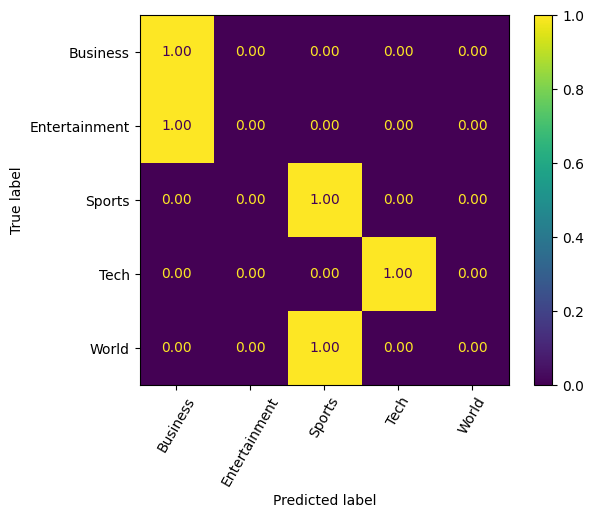

In [ ]:
display_confusion_matrix(x_test, y_test, clf)

In [ ]:
for index, row in selected_df.iterrows():
  print(row[0])
  bfs_search(row[0],row[1])

print(Data_Href)

In [ ]:
dfwe = pd.DataFrame(Data_Href)
dfwe

,href,section_value
0,https://timesofindia.indiatimes.com/business/i...,Business
1,https://timesofindia.indiatimes.com/business/i...,Business
2,https://timesofindia.indiatimes.com/business/i...,Business
3,https://timesofindia.indiatimes.com/business/i...,Business
4,https://timesofindia.indiatimes.com/business/i...,Business
5,https://timesofindia.indiatimes.com/business/i...,Business
6,https://timesofindia.indiatimes.com/business/i...,Business
7,https://timesofindia.indiatimes.com/business/i...,Business
8,https://timesofindia.indiatimes.com/business/i...,Business
9,https://timesofindia.indiatimes.com/business/i...,Business


In [ ]:
for index, row in selected_df.iterrows():
    start_url = row['href']
    bfs_search(start_url)

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all links with 'a' tag and 'href' attribute
        links_with_href = soup.find_all('a', class_='rxTTw', href=True)


        for link in links_with_href:
            absolute_link = link['href']

            # Append the values to the Data_Href dictionary
            Data_Href['href'].append(absolute_link)
            Data_Href['section_value'].append(row['section_value'])

# Convert the Data_Href dictionary to a DataFrame
result_df = pd.DataFrame(Data_Href)

# Display the resulting DataFrame
result_df

,href,section_value
0,https://timesofindia.indiatimes.com/business,Business
1,https://timesofindia.indiatimes.com/business/i...,Business
2,https://timesofindia.indiatimes.com/business/i...,Business
3,https://timesofindia.indiatimes.com/business/s...,Business
4,https://timesofindia.indiatimes.com/videos/bus...,Business
5,https://timesofindia.indiatimes.com/business/c...,Business
6,https://timesofindia.indiatimes.com/business/f...,Business
7,https://timesofindia.indiatimes.com/toi-dialogues,Business
8,https://timesofindia.indiatimes.com/business/c...,Business
9,https://timesofindia.indiatimes.com/business/p...,Business


In [ ]:
!pip install --upgrade certifi

In [ ]:


# Assuming you have the selected_df DataFrame
Data_Href = {"href": [], "section_value": []}
for index, row in result_df.iterrows():
    start_url = row['href']
    bfs_search(start_url)

# Convert the Data_Href dictionary to a DataFrame
result_df2 = pd.DataFrame(Data_Href)

# Display the resulting DataFrame
print(result_df2)



SSLError: ignored

In [ ]:
result_df.to_csv('filtered_result.csv', index=False)

In [ ]:
result_df['contains_cms'] = result_df['href'].str.contains('.cms')

# Filter the DataFrame based on the condition
filtered_df = result_df[result_df['contains_cms']]

# Drop the additional 'contains_cms' column if you don't need it anymore
filtered_df = filtered_df.drop(columns=['contains_cms'])

# Display the filtered DataFrame
filtered_df

,href,section_value
33,https://timesofindia.indiatimes.com/sports/box...,Sports


In [ ]:
filtered_df.to_csv('filtered_result.csv', index=False)

In [ ]:
#filtered_df = pd.read_csv("/content/filtered_result.csv")

In [ ]:
Data_Href = {"title": [], "article_body":[],"section_value": []}

for index, row in filtered_df.iterrows():
    url = row['href']
    response = requests.get(url)
    print(response)
    if response.status_code == 200:
        article = BeautifulSoup(response.text, 'lxml')
        # Extract all links with 'a' tag and 'href' attribute
        heading = soup.find('arttitle')
        print(heading)
        # # for link in links_with_href:
        #     absolute_link = link['href']

        #     # Append the values to the Data_Href dictionary
        #     Data_Href['href'].append(absolute_link)
        #     Data_Href['section_value'].append(row['section_value'])

# Convert the Data_Href dictionary to a DataFrame
# result_df = pd.DataFrame(Data_Href)

<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response [200]>
None
<Response 

KeyboardInterrupt: ignored

In [ ]:
df = pd.DataFrame(data)
df

In [ ]:
import requests
from bs4 import BeautifulSoup
from collections import deque

headers = {
    'authority': 'www.google.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
    # Add more headers as needed
}

# Assuming 'link' is the key in your 'data' dictionary containing article URLs
queue = deque(data['link'])

data2 = {'Headline': [], 'Content': []}

while queue:
    current_url = queue.popleft()
    print(f"Processing article link: {current_url}")

    response_article = requests.get(current_url, headers=headers)

    if response_article.status_code == 200:
        soup_article = BeautifulSoup(response_article.text, 'html.parser')

        # Extract headline
        headline_text = soup_article.find('h1', {'data-testid': 'headline'})
        if headline_text:
            data2['Headline'].append(headline_text.text)

        # Extract content (modify as per the actual structure of the article page)
        content_text = soup_article.find('div', class_='css-8hzhxf')  # Adjust the class as needed
        if content_text:
            data2['Content'].append(content_text.text)
    else:
        print(f"Failed to retrieve content for {current_url}. Status code: {response_article.status_code}")

print(data2)


Processing article link: https://www.nytimes.com/2024/01/03/business/economy/inflation-prices.html
Failed to retrieve content for https://www.nytimes.com/2024/01/03/business/economy/inflation-prices.html. Status code: 403
Processing article link: https://www.nytimes.com/2024/01/02/business/media/the-messenger-news-layoffs.html
Failed to retrieve content for https://www.nytimes.com/2024/01/02/business/media/the-messenger-news-layoffs.html. Status code: 403
Processing article link: https://www.nytimes.com/2024/01/02/business/media/cheddar-cnbc-furloughs.html
Failed to retrieve content for https://www.nytimes.com/2024/01/02/business/media/cheddar-cnbc-furloughs.html. Status code: 403
Processing article link: https://www.nytimes.com/2024/01/02/health/abortion-pills-advanced-provision.html
Failed to retrieve content for https://www.nytimes.com/2024/01/02/health/abortion-pills-advanced-provision.html. Status code: 403
Processing article link: https://www.nytimes.com/2024/01/02/business/dealb

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

url_address = "https://developers.whatismybrowser.com/useragents/explore/operating_system_name/ios/"
df = pd.read_html(url_address)
filtro = (df[0]['Hardware Type'] == 'Mobile - Phone') &  (df[0]['Software Type'] == 'Web Browser')
user_agents = df[0][filtro]['User agent'].values.tolist()

HTTPError: ignored

In [ ]:
user_agents

In [ ]:
url_address = "https://developers.whatismybrowser.com/useragents/explore/software_name/googlebot/"
df = pd.read_html(url_address)
filtro = (df[0]['Popularity'] == 'Very common') |  (df[0]['Popularity'] == 'Common')
user_agents = df[0][filtro]['User agent'].values.tolist()
user_agents

In [ ]:
user_agents =['Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/16D57',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 13_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko)',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.1 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 11_4_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.0 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 13_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.5 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 11_4_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15G77',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 11_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.0 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like Mac OS X) AppleWebKit/603.3.8 (KHTML, like Gecko) Version/10.0 Mobile/14G60 Safari/602.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_0_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.1 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/16C101',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.0 Mobile/15E148 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 12_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 like Mac OS X) AppleWebKit/604.5.6 (KHTML, like Gecko) Version/11.0 Mobile/15D100 Safari/604.1',
              'Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like Mac OS X) AppleWebKit/602.4.6 (KHTML, like Gecko) Version/10.0 Mobile/14D27 Safari/602.1']

In [ ]:
## Methods to define a random user-agent
from random import randint

def get_useragent():
  random_user = randint(1,len(user_agents)-1)
  return user_agents[random_user]

In [ ]:
get_useragent()

'Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.1 Mobile/15E148 Safari/604.1'

In [ ]:
import requests

url_address = 'https://www.whatismybrowser.com/detect/what-is-my-user-agent'
response = requests.get(url_address,
                        headers={ 'User-Agent': get_useragent() },
                        )

In [ ]:
print(response)

<Response [403]>
